In [0]:
# O Algoritmo K-Means é um algoritmo Não Supervisionado responsável por agrupar os dados em "clusters", 
# o algoritmo se baseia na distância euclidiana entre os datapoints no conjunto de dados, o K é um parâmetro
# utilizado para definir o número de "clusters".
# Para desenvolver o algoritmo K-Means é preciso seguir 5 passos básicos:
#    1 - Analisar a base de dados, observando a necessidade de normalizar ou escalar os dados de modo a facilitar os cálculos da distância 
#    2 - Determinar o cálculo de distância, neste trabalho utilizaremos a distância euclidiana
#    3 - Determinar a inicialização dos centroides
#    4 - Calcular a diferença de cada ponto até o centroide, definindo a qual centroide cada ponto de dado pertence
#    5 - Recalcular os centroides utilizando a média de distância entre todos os pontos do cluster, repetir esse passo até que o valor entre 
# o centroide antigo e o centroide novo seja menor que um limiar ou que n iterações sejam alcançadas.
# Raphael Mendes & Rogério Novo

In [0]:
from IPython.display import Image, clear_output
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/1/10/Euclidean_distance_3d_2_cropped.png", width=400,height=400)

def loading_message():
    message_pool = ["please wait... 640K ought to be enough for anybody"
    ,"please wait... the architects are still drafting"
    ,"please wait... the bits are breeding"
    ,"please wait... we're building the buildings as fast as we can"
    ,"please wait... would you prefer chicken, steak, or tofu?"
    ,"please wait... pay no attention to the man behind the curtain"
    ,"please wait... and enjoy the elevator music"
    ,"please wait... while the little elves draw your map"
    ,"please wait... a few bits tried to escape, but we caught them"
    ,"please wait... and dream of faster computers"
    ,"please wait... would you like fries with that?"
    ,"please wait... checking the gravitational constant in your locale"
    ,"please wait... go ahead -- hold your breath"
    ,"please wait... at least you're not on hold"
    ,"please wait... hum something loud while others stare"
    ,"please wait... you're not in Kansas any more"
    ,"please wait... the server is powered by a lemon and two electrodes"
    ,"please wait... we love you just the way you are"
    ,"please wait... while a larger software vendor in Seattle takes over the world"
    ,"please wait... we're testing your patience"
    ,"please wait... as if you had any other choice"
    ,"please wait... take a moment to sign up for our lovely prizes"
    ,"please wait... don't think of purple hippos"
    ,"please wait... follow the white rabbit"
    ,"please wait... why don't you order a sandwich?"
    ,"please wait... while the satellite moves into position"
    ,"please wait... the bits are flowing slowly today"
    ,"please wait... dig on the 'X' for buried treasure... ARRR!"
    ,"please wait... it's still faster than you could draw it"]

    return random.choice(message_pool)

In [0]:
'''
Authors: Raphael Mendes, Rogério Novo
Date: October 17th, 2019
Uberlandia - MG
'''


import random
import numpy as np
import pandas as pd

class Kmeans(object):
    
    def __init__(self, k = 3, min_distance = 0.0001):
        self.k = k
        # Minimum Threshold from old_centroid to new_centroid
        self.min_distance = min_distance
        
    def fit(self, df, iterations=500):
        # Transforms dataframe into array
        data = df.to_numpy()
        # Initialize the Centroids Randomly
        self.centroids = [data[random.randint(0,len(data))] for i in range(self.k)]
        
        # Initialize empty list of classes to store the points that belong to the cluster
        classes = [[] for c in range(self.k)]
        
        # Make sure the algorithm reachs a termination point
        converged = False
        iteration = 0
        
        while(converged==False and iteration < iterations):
            
            # Initialize class for new iteration
            classes = [[] for i in range(self.k)]
            
            for row in data:

                # Calculates which is the nearest centroid from the row
                dist_list = [self.euclidean_distance(row, c) for c in self.centroids]
                # The min value among centroids
                classification = dist_list.index(min(dist_list))
                # Row is assigned to its cluster
                classes[classification].append(row)

            # Save Past Centroids to calculate convergence
            previous_centroids = [c for c in self.centroids]

            # Calculate new centroids based on the average of each class
            for idx, c in enumerate(classes):
                self.centroids[idx] = np.average(c,axis = 0)

            # Flag Converged
            converged = True
            
            # Did it converge? That means that the centroids haven't changed above min_distance
            for idx, c in enumerate(classes):
                previous_centroid = previous_centroids[idx]
                new_centroid = self.centroids[idx]
                if np.sum((new_centroid - previous_centroid)/previous_centroid * 100.0) > self.min_distance:
                    converged = False    
                    
            iteration += 1
                
        # The Model
        self.classes=classes
    
    def predict(self, x):
        # Make a prediction of a Series of rows based on the classes
        x_pred = x.to_numpy()
        dist_list = [self.euclidean_distance(x_pred, c) for c in self.centroids]
        classification = dist_list.index(min(dist_list))
        return classification
    
    def euclidean_distance(self, p, q):
        dist = 0
        # Euclidean Distance using numpy
        dist = np.linalg.norm(p-q)
        return dist
        




        

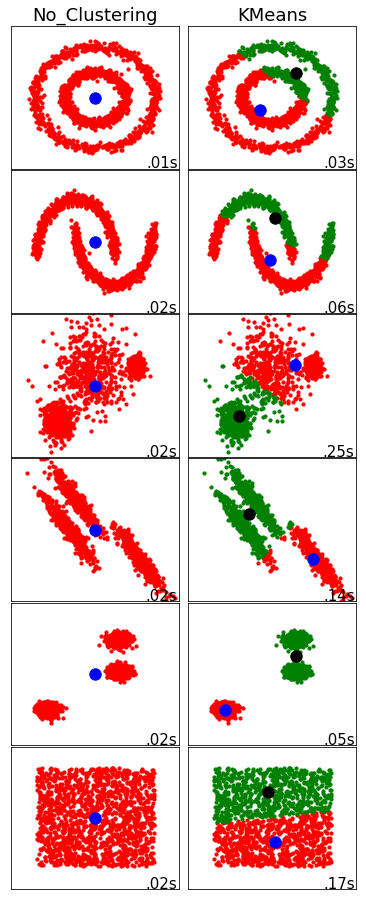

In [20]:
'''
The code here is adapted from sklearn, the toy datasets are based on sklean clustering section.
Reference: https://scikit-learn.org/stable/modules/clustering.html
'''

print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

datasets = [noisy_circles,noisy_moons,varied,aniso,blobs,no_structure]

plt.figure(figsize=(5.0, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

for i_dataset, dataset in enumerate(datasets):
    clustering_algorithms = [('No_Clustering',Kmeans(1)),('KMeans', Kmeans(2))]
    clear_output()
    print(loading_message())
    X, y = dataset

    # normalize dataset to avoid dimensionality curse
    X = StandardScaler().fit_transform(X)

    colors = 10*["r", "g", "c", "b", "k"]
    for name, clustering_algorithm in clustering_algorithms:
      plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
      if i_dataset == 0:
          plt.title(name, size=18)
      # Calculates the time to fit model
      t0 = time.time()
      clustering_algorithm.fit(pd.DataFrame(X)) 
      t1 = time.time()
      
      # Plot Centroids and All Points from the same class with the same color in subplot
      for idx, _class in enumerate(clustering_algorithm.classes):
        color = colors[idx]
        for row in _class:
          plt.scatter(row[0], row[1], color = color,s = 10)
      for idx, centroid in enumerate(clustering_algorithm.centroids):
        plt.scatter(clustering_algorithm.centroids[idx][0], clustering_algorithm.centroids[idx][1], s = 130, marker = "o", color = colors[3+idx])

      plt.xlim(-2.5, 2.5)
      plt.ylim(-2.5, 2.5)
      plt.xticks(())
      plt.yticks(())
      plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                transform=plt.gca().transAxes, size=15,
                horizontalalignment='right')
      plot_num += 1
clear_output()
plt.show()